In [2]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


      ┌─────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                    
 q_0: ┤ Initialize(0,1) ├─░────────────░───■──┤ H ├─░─┤M├────────────────────
      └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐                 
 q_1: ────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─────────────────
                          ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ ┌─┐
 q_2: ────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─┤M├
                          ░      └───┘ ░            ░  ║  ║  └─╥─┘  └─╥─┘ └╥┘
                                                       ║  ║    ║   ┌──╨──┐ ║ 
c0: 1/═════════════════════════════════════════════════╩══╬════╬═══╡ 0x1 ╞═╬═
                                                       0  ║ ┌──╨──┐└─────┘ ║ 
c1: 1/════════════════════════════════════════════════════╩═╡ 0x1 ╞════════╬═
                                                          0 └─────┘        ║ 
c2: 1/══════════════════════════════════════════════════════════

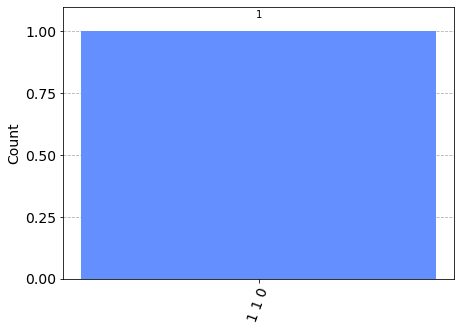

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import circuit_drawer, plot_histogram

# Create the quantum circuit with 3 qubits and 3 classical bits
q = QuantumRegister(3, 'q')  # Quantum register
c0 = ClassicalRegister(1, 'c0')  # Classical register for Alice's qubit
c1 = ClassicalRegister(1, 'c1')  # Classical register for Bob's qubit
c2 = ClassicalRegister(1, 'c2')  # Classical register for the result
circuit = QuantumCircuit(q, c0, c1, c2)

# Prepare the initial state to be teleported
circuit.initialize([0, 1], q[0])  # Apply X gate to put in state |1>
circuit.barrier()

# Create an entanglement between Alice's and Bob's qubits
circuit.h(q[1])
circuit.cx(q[1], q[2])
circuit.barrier()

# Teleportation process
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.barrier()

# Measure Alice's qubits and send the measurement results to Bob
circuit.measure(q[0], c0[0])
circuit.measure(q[1], c1[0])

# Apply corrective operations on Bob's qubit based on the measurement results
circuit.x(q[2]).c_if(c1, 1)
circuit.z(q[2]).c_if(c0, 1)

# Measure the teleported qubit
circuit.measure(q[2], c2[0])

# Visualize the circuit
print(circuit)
circuit_drawer(circuit, output='mpl')

# Simulate the circuit using the QASM simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1)
result = job.result()
teleported_state = result.get_counts(circuit)

# Print the teleported state
print("Teleported state:", teleported_state)


#-----------------------------------
plot_histogram(teleported_state)